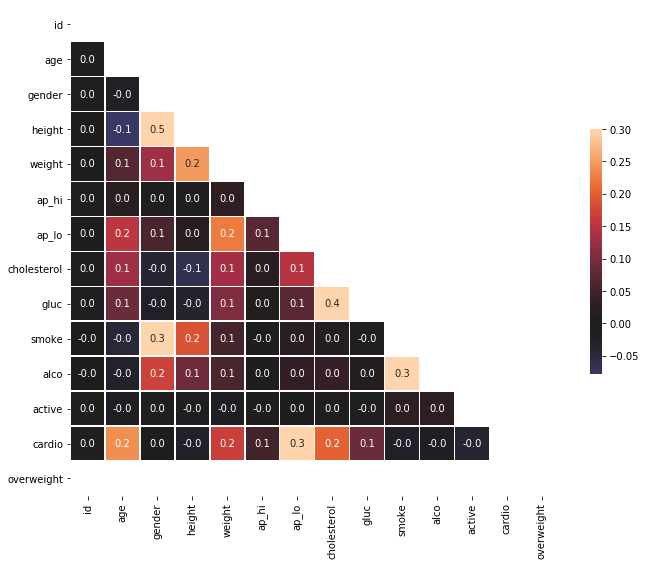

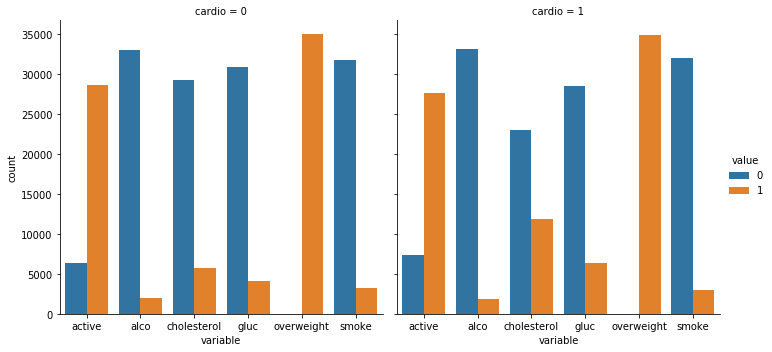

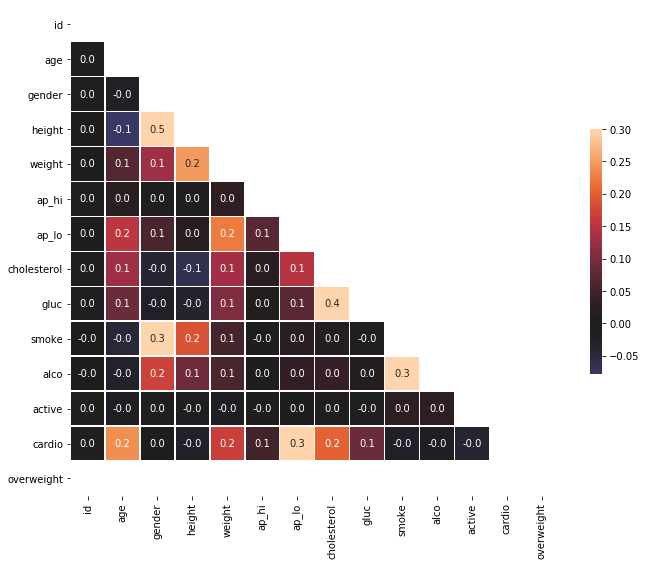

In [8]:
# This entrypoint file to be used in development. Start by reading README.md
#import medical_data_visualizer
from unittest import main


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")


# Add 'overweight' column
height_in_cm = df["height"]/100
weight_in_kg = df["weight"]
body_mass_index = weight_in_kg/height_in_cm


overweight = body_mass_index.copy()
df["overweight"] = overweight

def converttounit(x):
    if x < 25:
        return 0
    else:
        return 1
    
df["overweight"] = df["overweight"].apply(converttounit)



# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, 
# make the value 0. If the value is more than 1, make the value 1.

#Normalising fot Cholesterol
def choletounit(x):
    if x == 1:
        return 0
    else:
        return 1
    
df["cholesterol"] = df["cholesterol"].apply(choletounit)

#normalising for gluc

def gluctounit(x):
    if x == 1:
        return 0
    else:
        return 1
    
df["gluc"] = df["gluc"].apply(gluctounit)



# shape from wide to long with melt function in pandas




# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke' ])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke' ])

    # Draw the catplot with 'sns.catplot()'

    fig = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    
    #1diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
    df_ap = df[(df['ap_lo'] <= df['ap_hi'])]

    #2height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    df_height = df_ap[(df_ap['height'] >= df_ap['height'].quantile(0.025))]
    
    #3height is more than the 97.5th percentile
    df_heght2 = df_height[(df_height["height"]<=df_height["height"].quantile(0.97))]
        
    #4weight is less then the 2.5th percentile
    df_weight1 = df_heght2[(df_heght2["weight"]>=df_heght2["weight"].quantile(0.025))]
    
    
    #4weight is more than the 97.5th percentile
    df_weight2 = df_weight1[(df_weight1["weight"]<=df_weight1["weight"].quantile(0.975))]
    
    # Clean the data
    df_heat = df_weight2

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    
    
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

    
    # Do not modify the next two lines
#    fig.savefig('heatmap.png')
    return fig







# Test your function by calling it here
draw_cat_plot()
draw_heat_map()

# Run unit tests automatically
#main(module='test_module', exit=False)

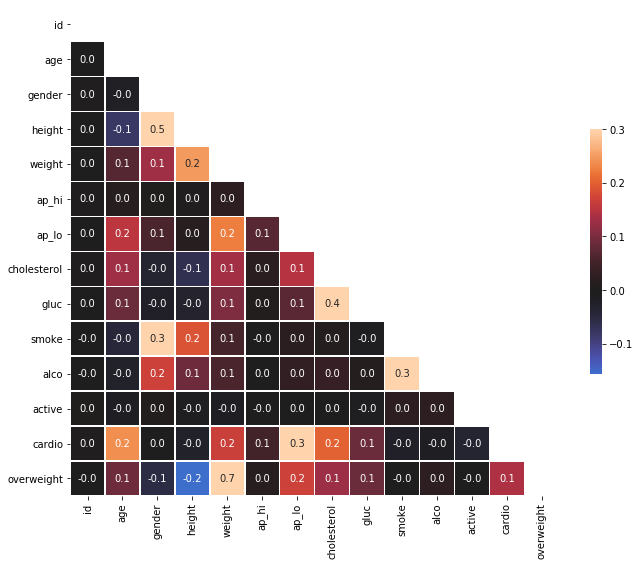

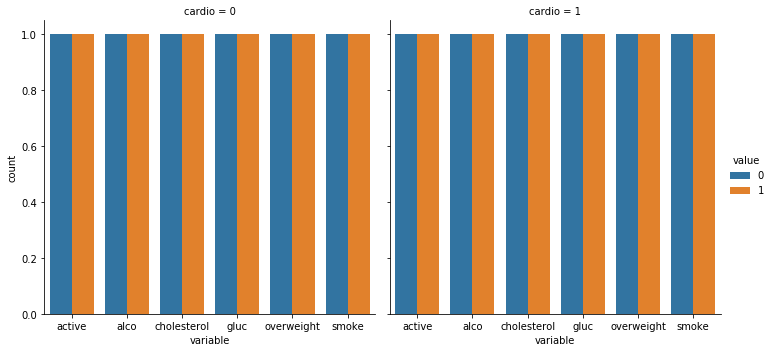

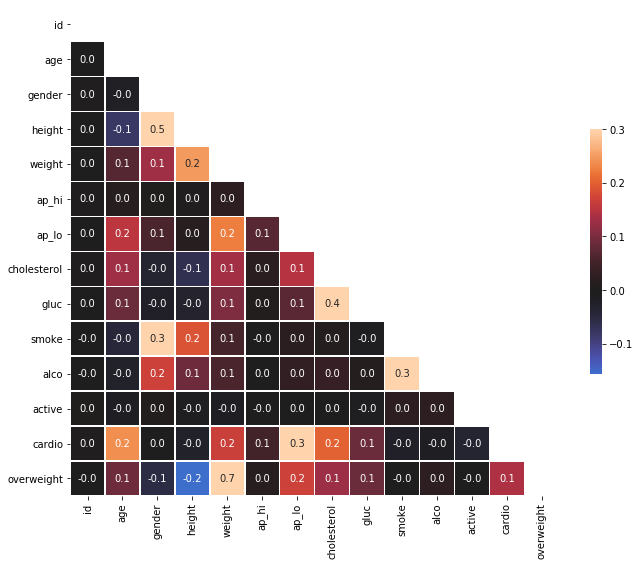

In [3]:
# This entrypoint file to be used in development. Start by reading README.md
#import medical_data_visualizer
from unittest import main


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")



# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda r: 0 if r < 25 else 1)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

# cholesterol normalization
df['cholesterol'] = df['cholesterol'].apply(lambda e: 0 if e == 1 else 1)

# gluc normalization
df['gluc'] = df['gluc'].apply(lambda y: 0 if y == 1 else 1)

# shape from wide to long with melt function in pandas




# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['variable', 'cardio', 'value'], as_index=False).count()


    # Draw the catplot with 'sns.catplot()'

    fig = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    
    #1diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
    df_ap = df[(df['ap_lo'] <= df['ap_hi'])]

    #2height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    df_height = df_ap[(df_ap['height'] >= df_ap['height'].quantile(0.025))]
    
    #3height is more than the 97.5th percentile
    df_heght2 = df_height[(df_height["height"]<=df_height["height"].quantile(0.97))]
        
    #4weight is less then the 2.5th percentile
    df_weight1 = df_heght2[(df_heght2["weight"]>=df_heght2["weight"].quantile(0.025))]
    
    
    #4weight is more than the 97.5th percentile
    df_weight2 = df_weight1[(df_weight1["weight"]<=df_weight1["weight"].quantile(0.975))]
    
    # Clean the data
    df_heat = df_weight2

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    
    
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig







# Test your function by calling it here
draw_cat_plot()
draw_heat_map()

# Run unit tests automatically
#main(module='test_module', exit=False)

In [ ]:
df.head(2)

In [14]:
#df_melted = pd.melt(df, id_vars=["cardio"], value_vars=['id', 'age', 'gender', 'height', 
#                                                        'weight', 'ap_hi', 'ap_lo','cholesterol', 
#                                                        'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_melted = pd.melt(df, id_vars=["cardio"], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_melted

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [15]:
cholezero = df_melted[df_melted["cardio"]==0]


cholezero.groupby(["variable"]).sum()


,cardio,value
variable,,
active,0,28643
alco,0,1941
cholesterol,0,5691
gluc,0,4127
overweight,0,34999
smoke,0,3240


In [16]:
choleone = df_melted[df_melted["cardio"]==1]


myman = choleone.groupby(["variable"]).sum()
myman

,cardio,value
variable,,
active,34979,27618
alco,34979,1823
cholesterol,34979,11924
gluc,34979,6394
overweight,34979,34961
smoke,34979,2929


In [17]:
#1diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))

df_ap = df[(df['ap_lo'] <= df['ap_hi'])]

In [18]:
#1diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))

df_ap = df[(df['ap_lo'] <= df['ap_hi'])]

#2height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

df_height = df_ap[(df_ap['height'] >= df_ap['height'].quantile(0.025))]




In [19]:
#2height is more than the 97.5th percentile
df_heght2 = df_height[(df_height["height"]<=df_height["height"].quantile(0.97))]
df_heght2


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [20]:
#3weight is less then the 2.5th percentile

df_weight1 = df_heght2[(df_heght2["weight"]>=df_heght2["weight"].quantile(0.025))]
df_weight1

#df_heght2[df_heght2["overweight"]<1]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [21]:
#4weight is more than the 97.5th percentile

df_weight2 = df_weight1[(df_weight1["weight"]<=df_weight1["weight"].quantile(0.975))]
df_weight2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,1
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [22]:
diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less then the 2.5th percentile
weight is more than the 97.5th percentile

SyntaxError: invalid syntax (<ipython-input-22-ef18cd42a2a8>, line 1)

In [23]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweight'],
      dtype='object')

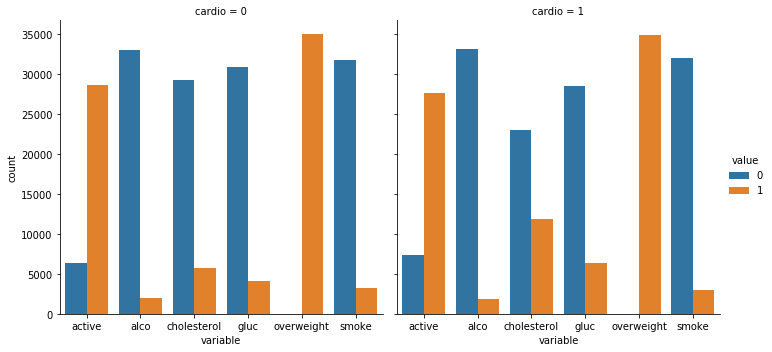

In [24]:
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke' ])


sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")


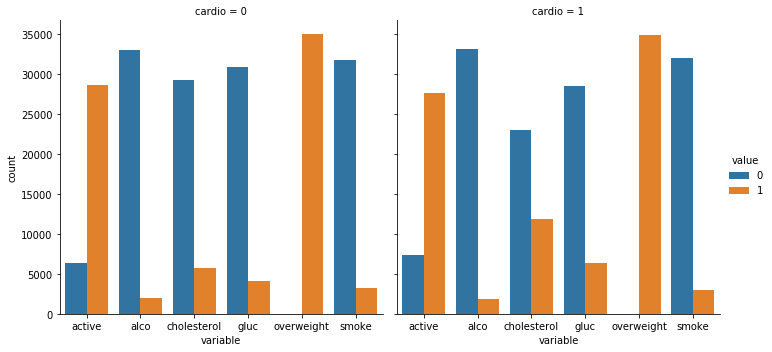

In [25]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")

g = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")


In [26]:
me = df_weight2.corr(method='pearson')

In [27]:
df_heght2[df_heght2["overweight"]<1]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
5362,7634,16755,1,167,41.0,110,80,0,0,0,0,1,0,0
5794,8226,17663,1,151,37.0,120,80,0,0,0,0,1,0,0
9487,13518,20958,2,172,40.0,140,90,0,1,0,0,1,1,0
10447,14908,22007,1,162,38.0,100,70,0,0,0,0,1,0,0
10627,15182,21669,1,153,37.0,150,80,1,1,0,0,1,1,0
11876,16963,17512,1,157,39.0,90,70,0,0,0,0,1,0,0
16322,23318,21872,1,165,35.0,100,70,0,0,0,0,1,0,0
16906,24167,17272,2,170,31.0,150,90,1,1,0,0,1,1,0
16966,24244,21860,1,165,40.0,90,60,1,0,0,0,1,1,0
18559,26503,18140,1,160,30.0,120,80,0,0,0,0,1,1,0


In [28]:
me
np.tril(np.ones(me.shape)).astype(np.bool)[0:14,0:14]
df_lt = me.where(np.tril(np.ones(me.shape)).astype(np.bool))
df_lt

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.002623,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,0.003799,-0.018274,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.000221,-0.077426,0.504722,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,0.000144,0.069705,0.130116,0.248868,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,NaN,NaN,NaN,NaN,NaN
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,NaN,NaN,NaN,NaN


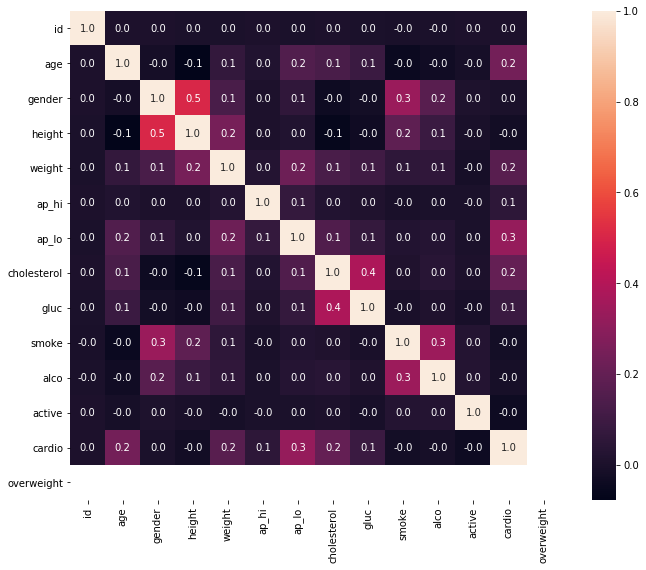

In [29]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(me, annot=True, fmt='.1f')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_lt, annot=True, fmt='.1f')
plt.show()

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(me, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(me, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

NameError: name 'me' is not defined

In [12]:
https://repl.it/repls/VictoriousScratchyCases

SyntaxError: invalid syntax (<ipython-input-12-d87cfe71226f>, line 1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda v: 0 if v < 25 else 1)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

# cholesterol normalization
df['cholesterol'] = df['cholesterol'].apply(lambda v: 0 if v == 1 else 1)

# gluc normalization
df['gluc'] = df['gluc'].apply(lambda v: 0 if v == 1 else 1)


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['variable', 'cardio', 'value'], as_index=False).count()

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(
      x = 'variable',
      y = 'total',
      col = 'cardio',
      hue = 'value',
      kind = 'bar',
      data = df_cat
      )
    fig = g.fig
    

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
      ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12,12))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(
      corr,
      linewidths=.5,
      annot=True,
      fmt='.1f',
      mask=mask,
      square=True,
      center=0,
      vmin=-0.1,
      vmax=0.25,
      cbar_kws={'shrink':.45, 'format':'%.2f'}
      )

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


In [1]:
#FINAL SOLUTION https://repl.it/repls/PlasticZestyModels#medical_data_visualizer.py
    
    
    
    
    
    
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")



# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda r: 0 if r < 25 else 1)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

# cholesterol normalization
df['cholesterol'] = df['cholesterol'].apply(lambda e: 0 if e == 1 else 1)

# gluc normalization
df['gluc'] = df['gluc'].apply(lambda y: 0 if y == 1 else 1)

# shape from wide to long with melt function in pandas




# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['variable', 'cardio', 'value'], as_index=False).count()


   
    # Draw the catplot with 'sns.catplot()'
    m = sns.catplot(
      x = 'variable',
      y = 'total',
      col = 'cardio',
      hue = 'value',
      kind = 'bar',
      data = df_cat
      )
    fig = m.fig
    

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
  
    # all df Clean the data
    df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
      ]


    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    
    
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig



